
# A Comparative Study of AutoML Tools for Classification on Custom CSV Data: Learning and Implementation

##  DATASET - Heart Disease Prediction

In [2]:
# importing required libraries:-
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().mean()

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [7]:
# Split the data into features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

In [8]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


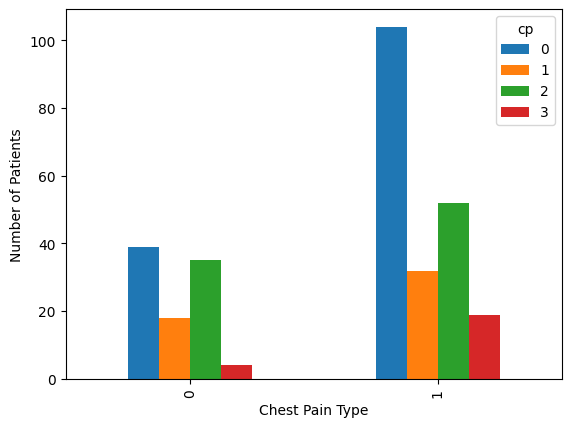

In [9]:
# @title Chest Pain Type by Gender

import matplotlib.pyplot as plt
df.groupby(['sex', 'cp']).size().unstack().plot(kind='bar')
plt.xlabel('Chest Pain Type')
_ = plt.ylabel('Number of Patients')

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 1. FLAML (Fast Lightweight Automatic Machine Learning)

Purpose: FLAML, developed by Microsoft, aims to provide a fast and resource-efficient way to automatically find the best machine learning models and hyperparameters. It is designed for users with limited computational resources who need quick and accurate results.

In [11]:
!pip install "flaml[auto]"
import pandas as pd
from flaml import AutoML

# Initialize the AutoML model
automl = AutoML()

# Define the AutoML configuration (adjust time_budget if needed)
settings = {
    "time_budget": 800,  # Time budget in seconds (consider increasing if necessary)
    "metric": 'accuracy',
    "task": 'classification',
    "log_file_name": 'automl.log',
}

# Train the model
automl.fit(X_train=X_train, y_train=y_train, **settings)



# Predict and evaluate
y_pred = automl.predict(X_test)

# Performance measurement
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


In [12]:
# Get the best model configuration
best_config = automl.best_config

# Get the best model instance
best_model = automl.best_estimator

# Get the name of the best model
best_model_name = best_model.__class__.__name__


# Print the best model configuration
print("Best model configuration:",best_config)


# Print the name of the best model
print("Best model:", best_model_name)

NameError: name 'automl' is not defined

In [13]:
# Open and read the log file
with open('automl.log', 'r') as file:
    log_content = file.readlines()

# Extract information about different models and accuracies
for line in log_content:
    if "Model:" in line and "Accuracy:" in line:
        model_info = line.strip().split(", ")
        model_name = model_info[0].split(": ")[1]
        accuracy = float(model_info[1].split(": ")[1])
        print(f"Model: {model_name}, Accuracy: {accuracy}")


## 2. Auto-sklearn

Purpose: Auto-sklearn extends the popular scikit-learn library to automatically select and tune machine learning models. It uses Bayesian optimization to explore different pipelines and hyperparameters, making it accessible and highly customizable for various machine learning tasks.

In [14]:
!pip show auto-sklearn

In [28]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
import autosklearn.classification
from autosklearn.classification import AutoSklearnClassifier #version may changes refer documentation.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load your data into X and y variables

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AutoSklearnClassifier object
clf = AutoSklearnClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

ModuleNotFoundError: No module named 'autosklearn'

## 3. TPOT (Tree-based Pipeline Optimization Tool)
Purpose: TPOT automates the process of designing and optimizing machine learning pipelines using genetic programming. Its primary goal is to find the best pipeline by evolving and selecting the best combinations of preprocessing steps and models over multiple generations.

In [16]:
!pip install tpot

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from tpot import TPOTClassifier

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize TPOT classifier
tpot = TPOTClassifier(verbosity=2, generations=10, population_size=20)

# Train the model
tpot.fit(X_train, y_train)

# Predict and evaluate
y_pred = tpot.predict(X_test)

# Performance measurement
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

# Export the best pipeline
tpot.export('tpot_pipeline.py')


Optimization Progress:   0%|          | 0/220 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8346088435374149

Generation 2 - Current best internal CV score: 0.8346088435374149

Generation 3 - Current best internal CV score: 0.8346088435374149

Generation 4 - Current best internal CV score: 0.8387755102040817

Generation 5 - Current best internal CV score: 0.8387755102040817

Generation 6 - Current best internal CV score: 0.8387755102040817

Generation 7 - Current best internal CV score: 0.8387755102040817

Generation 8 - Current best internal CV score: 0.8387755102040817

Generation 9 - Current best internal CV score: 0.8387755102040817

Generation 10 - Current best internal CV score: 0.8387755102040817

Best pipeline: ExtraTreesClassifier(VarianceThreshold(input_matrix, threshold=0.001), bootstrap=True, criterion=gini, max_features=0.6500000000000001, min_samples_leaf=6, min_samples_split=9, n_estimators=100)
Accuracy: 0.8360655737704918
Confusion Matrix:
[[25  4]
 [ 6 26]]
Classification Report:
              precision    re

## 4.H2O.ai AutoML
Purpose: H2O.ai AutoML provides a robust and scalable platform for automating the training and tuning of machine learning models. It supports a wide range of tasks including classification, regression, and time series forecasting, with an emphasis on model interpretability and performance.

In [17]:
!pip install h2o

In [18]:
import h2o
from h2o.automl import H2OAutoML
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd

# Initialize the H2O cluster
h2o.init()

# Convert pandas dataframe to H2O dataframe
data = h2o.H2OFrame(df)

# Split into training and testing sets
train, test = data.split_frame(ratios=[.8], seed=42)

# Identify predictors and target
x = data.columns[:-1]  # Features
y = data.columns[-1]   # Target

# Initialize H2O AutoML
aml = H2OAutoML(max_runtime_secs=300)

# Train the model
aml.train(x=x, y=y, training_frame=train)

# View the leaderboard
lb = aml.leaderboard
print(lb)

# Predict and evaluate
preds = aml.leader.predict(test)
y_pred = preds.as_data_frame()['predict'].astype(int)
y_true = test[y].as_data_frame().values.flatten().astype(int)

# Performance measurement
accuracy = accuracy_score(y_true, y_pred)
conf_matrix = confusion_matrix(y_true, y_pred)
class_report = classification_report(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,21 mins 26 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,1 day
H2O_cluster_name:,H2O_from_python_unknownUser_ebnyzu
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
03:53:09.250: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.

██
03:53:14.956: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.
03:53:16.245: _response param, We have detected that your response column has only 2 unique values (0/1). If you wish to train a binary model instead of a regression model, convert your target column to categorical before training.


03:53:16.405: GBM_1_AutoML_1_20240515_35308 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20240515_353

In [27]:
## EvalML
### EvalML is another AutoML library, similar to FLAML and TPOT, but with its own set of features and capabilities. It's developed by Alteryx and is designed to automate the machine learning model selection and optimization process
!pip install evalml
import evalml
m


ImportError: cannot import name 'DiversityScore' from 'featuretools.primitives' (/usr/local/lib/python3.10/dist-packages/featuretools/primitives/__init__.py)

In [ ]:
from evalml import AutoMLSearch
from evalml.problem_types import ProblemTypes

# Define your data and problem type
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type=ProblemTypes.CLASSIFICATION)

# Execute search
automl.search()

# Retrieve the best pipeline
best_pipeline = automl.best_pipeline

# Evaluate on test data
score = best_pipeline.score(X_test, y_test, objectives=["accuracy"])
print("Accuracy:", score["accuracy"])
